# Stock predictions using RNN

## Data can be downloaded from the below website in 

### https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.aspx?flag=0

### For this project I have shared the data files in xlsx format.

### These excels have been pre-processed and treated for missing data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import math
import datetime
import os
import tensorflow as tf
from sklearn.metrics import r2_score

# Loading datasets & Describing

In [86]:
df = pd.read_excel("Data-23years Arranged.xlsx",sheet_name="Sheet2", index_col = 0)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8399 entries, 1996-01-08 to 2019-01-05
Data columns (total 4 columns):
Open     8399 non-null float64
High     8399 non-null float64
Low      8399 non-null float64
Close    8399 non-null float64
dtypes: float64(4)
memory usage: 328.1 KB
None
                 Open       High        Low      Close
Date                                                  
1996-01-08  17.478701  17.643801  16.922100  17.063601
1996-01-09  16.889000  18.681700  16.705000  17.997700
1996-01-10  17.408001  17.714600  17.054100  17.172100
1996-01-11  16.983400  17.926901  16.983400  17.827801
1996-01-12  17.879700  18.233500  17.573099  17.837299


In [87]:
df.describe()

,Open,High,Low,Close
count,8399.000000,8399.000000,8399.000000,8399.000000
mean,132.286712,134.256721,130.145829,132.104560
std,101.848303,103.136230,100.394275,101.675869
min,13.478200,13.959400,13.214000,13.346100
25%,25.993999,26.324200,25.515151,25.847751
50%,115.557999,117.699997,112.029999,115.099998
75%,227.500000,230.394996,224.035004,226.980003
max,350.500000,351.500000,341.325012,343.345001


In [96]:
df_og = pd.read_excel("C:/Users/imran/Desktop/sudarshan_python_scripts/deep_lear/Data-23years Arranged_new.xlsx",sheet_name="Sheet1",index_col=0)
print(df_og.info())
print(df_og.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2019-01-04 to 2019-02-04
Data columns (total 4 columns):
Open     32 non-null float64
High     32 non-null float64
Low      32 non-null float64
Close    32 non-null float64
dtypes: float64(4)
memory usage: 1.2 KB
None
                  Open   High         Low       Close
Date                                                 
2019-01-04  292.100006  299.0  291.500000  297.649994
2019-01-05  292.100006  299.0  291.500000  297.649994
2019-01-06  292.100006  299.0  291.500000  297.649994
2019-01-07  301.049988  301.5  295.200012  296.299988
2019-01-08  295.799988  306.0  294.750000  305.299988


# Dataframe created to induce a sudden attack in trend

In [97]:
df1 = pd.read_excel("C:/Users/imran/Desktop/sudarshan_python_scripts/deep_lear/Data-23years Arranged_new.xlsx",sheet_name="Sheet2",index_col=0)
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2019-01-04 to 2019-02-04
Data columns (total 4 columns):
Open     32 non-null float64
High     32 non-null float64
Low      32 non-null float64
Close    32 non-null float64
dtypes: float64(4)
memory usage: 1.2 KB
None
                  Open   High     Low       Close
Date                                             
2019-01-04  292.100006  299.0  291.50  297.649994
2019-01-05  292.100006  299.0  291.50  297.649994
2019-01-06  292.100006  299.0  291.50  297.649994
2019-01-07  500.000000  500.0  500.00  500.000000
2019-01-08  295.799988  306.0  294.75  305.299988


# Visualization of data

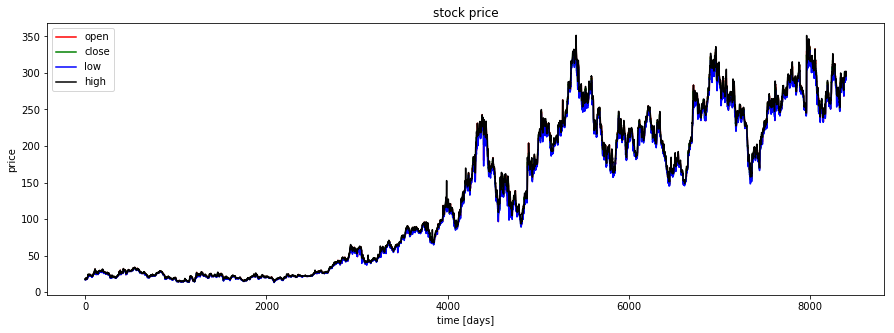

In [90]:
plt.figure(figsize=(15, 5));
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

Text(0.5,1,'high stock price')

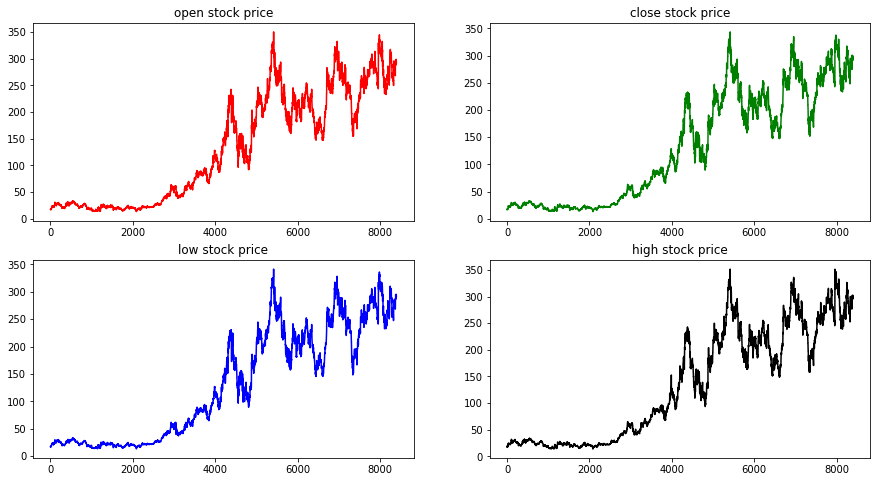

In [91]:
plt.figure(figsize=(15, 8));
plt.subplot(2,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.title('open stock price')
plt.subplot(2,2,2);
plt.plot(df.Close.values, color='green', label='close')
plt.title('close stock price')
plt.subplot(2,2,3);
plt.plot(df.Low.values, color='blue', label='low')
plt.title('low stock price')
plt.subplot(2,2,4);
plt.plot(df.High.values, color='black', label='high')
plt.title('high stock price')

# Visual of Attack Dataset

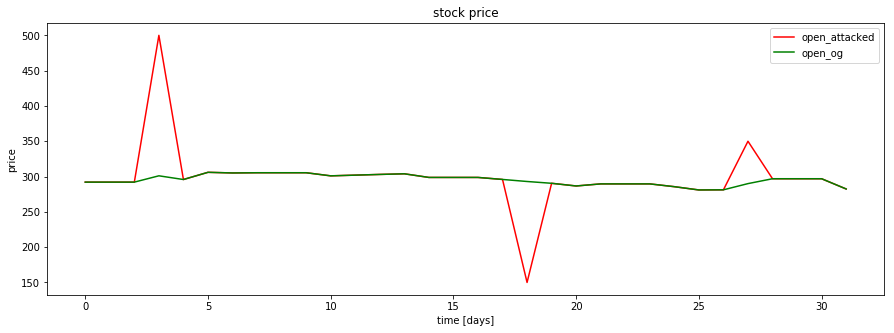

In [101]:
plt.figure(figsize=(15, 5));
plt.plot(df1.Open.values, color='red', label='open_attacked')
plt.plot(df_og.Open.values, color='green', label='open_og')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

In [111]:
pct_change = df1.pct_change()
pct_change = pct_change.round(1)
pct_change = pct_change.abs()
pct_change.head    

<bound method NDFrame.head of             Open  High  Low  Close
Date                              
2019-01-04   NaN   NaN  NaN    NaN
2019-01-05   0.0   0.0  0.0    0.0
2019-01-06   0.0   0.0  0.0    0.0
2019-01-07   0.7   0.7  0.7    0.7
2019-01-08   0.4   0.4  0.4    0.4
2019-01-09   0.0   0.0  0.0    0.0
2019-01-10   0.0   0.0  0.0    0.0
2019-01-11   0.0   0.0  0.0    0.0
2019-01-12   0.0   0.0  0.0    0.0
2019-01-13   0.0   0.0  0.0    0.0
2019-01-14   0.0   0.0  0.0    0.0
2019-01-15   0.0   0.0  0.0    0.0
2019-01-16   0.0   0.0  0.0    0.0
2019-01-17   0.0   0.0  0.0    0.0
2019-01-18   0.0   0.0  0.0    0.0
2019-01-19   0.0   0.0  0.0    0.0
2019-01-20   0.0   0.0  0.0    0.0
2019-01-21   0.0   0.0  0.0    0.0
2019-01-22   0.5   0.5  0.5    0.5
2019-01-23   0.9   1.0  0.9    0.9
2019-01-24   0.0   0.0  0.0    0.0
2019-01-25   0.0   0.0  0.0    0.0
2019-01-26   0.0   0.0  0.0    0.0
2019-01-27   0.0   0.0  0.0    0.0
2019-01-28   0.0   0.0  0.0    0.0
2019-01-29   0.0   0.0  0

# Removing attacks by replacing with previous days values

#### Attack causes disturbance in the model having repercussions on the days to be followed. To Identify the attacks here I have used the trends percentage rise or fall. The trend show a particular threshold rise or fall in the price, any sudden change beyond the threshold could be a potential attack. 

In [99]:
def lookup_attack(stock):
    data = pd.DataFrame(stock)
    pct_change = data.pct_change()
    pct_change = pct_change.round(1)
    pct_change = pct_change.abs()
    
    for index in range(pct_change.shape[0]):
        if pct_change.iloc[index,0] > 0.1 and  pct_change.iloc[index+1,0] > 0.1:
            data.iloc[index,0] = data.iloc[index-1,0]
    
    for index in range(pct_change.shape[0]):
        if pct_change.iloc[index,1] > 0.1 and  pct_change.iloc[index+1,1] > 0.1:
            data.iloc[index,1] = data.iloc[index-1,1]

    for index in range(pct_change.shape[0]):
        if pct_change.iloc[index,2] > 0.1 and  pct_change.iloc[index+1,2] > 0.1:
            data.iloc[index,2] = data.iloc[index-1,2]

    for index in range(pct_change.shape[0]):
        if pct_change.iloc[index,3] > 0.1 and  pct_change.iloc[index+1,3] > 0.1:
            data.iloc[index,3] = data.iloc[index-1,3]
    
    return(data)

df_revised = df1.copy()
df_revised = lookup_attack(df_revised)
df_revised.head(10)
    

,Open,High,Low,Close
Date,,,,
2019-01-04,292.100006,299.000000,291.500000,297.649994
2019-01-05,292.100006,299.000000,291.500000,297.649994
2019-01-06,292.100006,299.000000,291.500000,297.649994
2019-01-07,292.100006,299.000000,291.500000,297.649994
2019-01-08,295.799988,306.000000,294.750000,305.299988
2019-01-09,306.000000,307.100006,300.750000,305.299988
2019-01-10,305.100006,307.500000,303.500000,305.549988
2019-01-11,305.399994,306.200012,300.950012,302.750000
2019-01-12,305.399994,306.200012,300.950012,302.750000


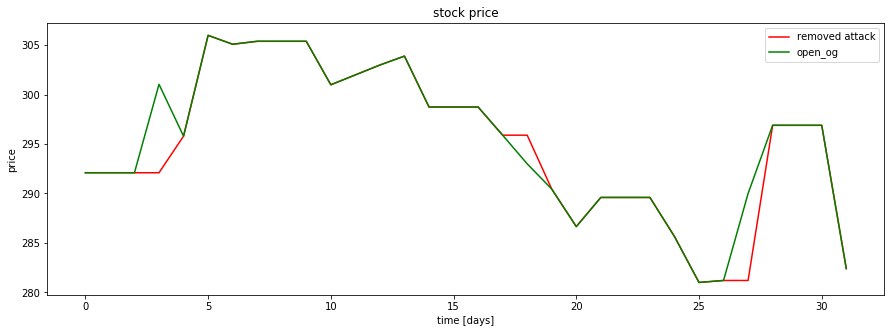

In [100]:
plt.figure(figsize=(15, 5));
plt.plot(df_revised.Open.values, color='red', label='removed attack')
plt.plot(df_og.Open.values, color='green', label='open_og')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

# Normalization and Splitting of Dataset

In [102]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(10/100*data.shape[0]));  
    test_set_size = int(np.round(10/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

def load_attack(stock, seq_len):
    data1_raw = stock.as_matrix() # convert to numpy array
    data1 = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data1_raw) - seq_len): 
        data1.append(data1_raw[index: index + seq_len])
        
    data1 = np.array(data1);
    
    x_attack = data1[:,:-1,:]
    y_attack = data1[:,-1,:]
    
    return [x_attack, y_attack]

def load_attack_revised(stock, seq_len):
    data2_raw = stock.as_matrix() # convert to numpy array
    data2 = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data2_raw) - seq_len): 
        data2.append(data2_raw[index: index + seq_len])
        
    data2 = np.array(data2);
    
    x_attack_revised = data2[:,:-1,:]
    y_attack_revised = data2[:,-1,:]
    
    return [x_attack_revised, y_attack_revised]

# choose one stock
df_stock = df.copy()
df1_stock = df1.copy()
df_revised_stock = df_revised.copy()
#df_stock.drop(['symbol'],1,inplace=True)
#df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

cols = list(df1_stock.columns.values)
print('df1_stock.columns.values = ', cols)

cols = list(df_revised_stock.columns.values)
print('df_revised_stock.columns.values = ', cols)


# normalize stock
df_stock_norm = df_stock.copy()
df1_stock_norm = df1_stock.copy()
df_revised_stock_norm = df_revised_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)
df1_stock_norm = normalize_data(df1_stock_norm)
df_revised_stock_norm = normalize_data(df_revised_stock_norm)


# create train, test data
seq_len = 5 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
x_attack, y_attack = load_attack(df1_stock_norm, seq_len)
x_attack_revised, y_attack_revised = load_attack_revised(df_revised_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)
print('x_attack.shape = ',x_attack.shape)
print('y_attack.shape = ',y_attack.shape)
print('x_attack_revised.shape = ',x_attack_revised.shape)
print('y_attack_revised.shape = ',y_attack_revised.shape)

df_stock.columns.values =  ['Open', 'High', 'Low', 'Close']
df1_stock.columns.values =  ['Open', 'High', 'Low', 'Close']
df_revised_stock.columns.values =  ['Open', 'High', 'Low', 'Close']
x_train.shape =  (6716, 4, 4)
y_train.shape =  (6716, 4)
x_valid.shape =  (839, 4, 4)
y_valid.shape =  (839, 4)
x_test.shape =  (839, 4, 4)
y_test.shape =  (839, 4)
x_attack.shape =  (27, 4, 4)
y_attack.shape =  (27, 4)
x_attack_revised.shape =  (27, 4, 4)
y_attack_revised.shape =  (27, 4)


C:\Users\imran\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\imran\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\imran\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# Building Recurring Neural Network

In [103]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    y_attack_pred = sess.run(outputs, feed_dict={X: x_attack})
    y_attack_revised_pred = sess.run(outputs, feed_dict={X: x_attack_revised})

0.00 epochs: MSE train/valid = 0.006695/0.014684
5.00 epochs: MSE train/valid = 0.000120/0.000370
9.99 epochs: MSE train/valid = 0.000067/0.000180
14.99 epochs: MSE train/valid = 0.000069/0.000185
19.98 epochs: MSE train/valid = 0.000064/0.000213
24.98 epochs: MSE train/valid = 0.000055/0.000158
29.97 epochs: MSE train/valid = 0.000054/0.000144
34.97 epochs: MSE train/valid = 0.000074/0.000252
39.96 epochs: MSE train/valid = 0.000065/0.000214
44.96 epochs: MSE train/valid = 0.000116/0.000450
49.96 epochs: MSE train/valid = 0.000051/0.000150
54.95 epochs: MSE train/valid = 0.000076/0.000224
59.95 epochs: MSE train/valid = 0.000050/0.000135
64.94 epochs: MSE train/valid = 0.000048/0.000132
69.94 epochs: MSE train/valid = 0.000190/0.000481
74.93 epochs: MSE train/valid = 0.000048/0.000124
79.93 epochs: MSE train/valid = 0.000045/0.000117
84.92 epochs: MSE train/valid = 0.000062/0.000202
89.92 epochs: MSE train/valid = 0.000049/0.000132
94.92 epochs: MSE train/valid = 0.000051/0.000131
99.

# Prediction for Open stock Price

correct sign prediction for close - close price for train/valid/test: 0.74/0.78/0.77
RMSE for test_dataset/validation_dataset/train_dataset: 0.02/0.01/0.01
R-squared for test_dataset/validation_dataset/train_dataset: 0.95/0.99/1.00


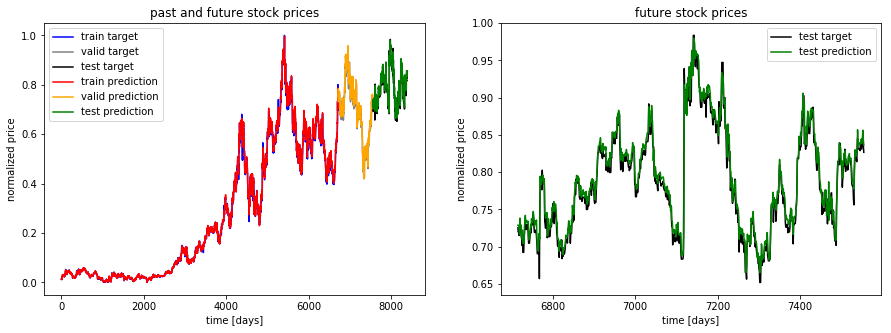

In [104]:
ft = 0 # 0 = open, 1 = high, 2 = low, 3 = close

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - close price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

r2_test = r2_score(y_test,y_test_pred)
r2_validate = r2_score(y_valid,y_valid_pred)
r2_train = r2_score(y_train,y_train_pred)

from sklearn.metrics import mean_squared_error
from math import sqrt
rms_test = sqrt(mean_squared_error(y_test, y_test_pred))
rms_validate = sqrt(mean_squared_error(y_valid, y_valid_pred))
rms_train = sqrt(mean_squared_error(y_train, y_train_pred))

print('RMSE for test_dataset/validation_dataset/train_dataset: %.2f/%.2f/%.2f'%(
    rms_test,rms_validate,rms_train))

print('R-squared for test_dataset/validation_dataset/train_dataset: %.2f/%.2f/%.2f'%(
    r2_test,r2_validate,r2_train))

# Prediction for High stock Price

correct sign prediction for close - open price for train/valid/test: 0.74/0.78/0.77
RMSE for test_dataset/validation_dataset/train_dataset: 0.02/0.01/0.01
R-squared for test_dataset/validation_dataset/train_dataset: 0.95/0.99/1.00


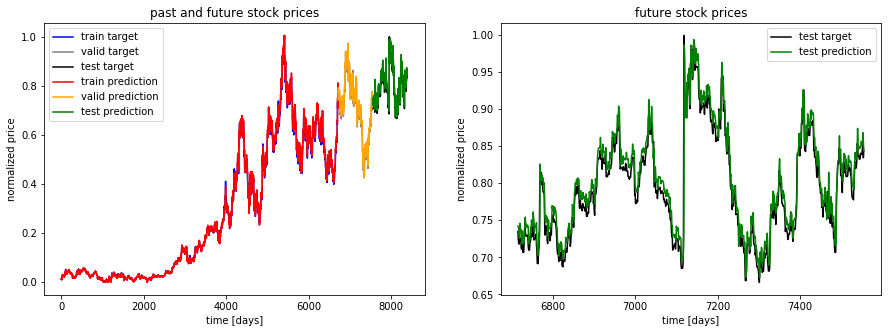

In [105]:
ft = 1 # 0 = open, 1 = high, 2 = low, 3 = close



## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

rms_test = sqrt(mean_squared_error(y_test, y_test_pred))
rms_validate = sqrt(mean_squared_error(y_valid, y_valid_pred))
rms_train = sqrt(mean_squared_error(y_train, y_train_pred))

print('RMSE for test_dataset/validation_dataset/train_dataset: %.2f/%.2f/%.2f'%(
    rms_test,rms_validate,rms_train))


r2_test = r2_score(y_test,y_test_pred)
r2_validate = r2_score(y_valid,y_valid_pred)
r2_train = r2_score(y_train,y_train_pred)
print('R-squared for test_dataset/validation_dataset/train_dataset: %.2f/%.2f/%.2f'%(
    r2_test,r2_validate,r2_train))


# Prediction for Low stock Price

correct sign prediction for close - high price for train/valid/test: 0.74/0.78/0.77
RMSE for test_dataset/validation_dataset/train_dataset: 0.02/0.01/0.01
R-squared for test_dataset/validation_dataset/train_dataset: 0.95/0.99/1.00


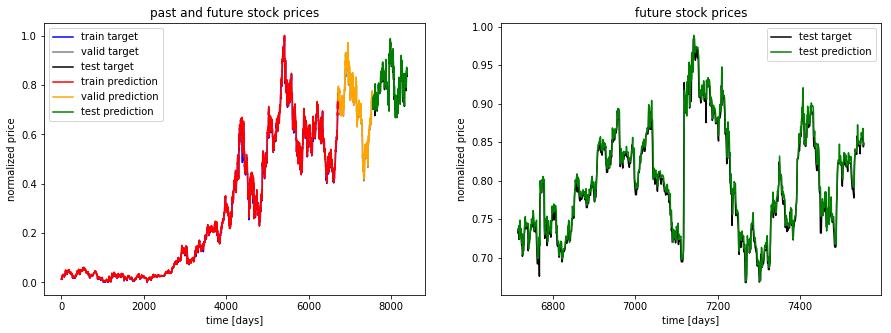

In [106]:
ft = 2 # 0 = open, 1 = high, 2 = low, 3 = close

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - high price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

rms_test = sqrt(mean_squared_error(y_test, y_test_pred))
rms_validate = sqrt(mean_squared_error(y_valid, y_valid_pred))
rms_train = sqrt(mean_squared_error(y_train, y_train_pred))

print('RMSE for test_dataset/validation_dataset/train_dataset: %.2f/%.2f/%.2f'%(
    rms_test,rms_validate,rms_train))


r2_test = r2_score(y_test,y_test_pred)
r2_validate = r2_score(y_valid,y_valid_pred)
r2_train = r2_score(y_train,y_train_pred)
print('R-squared for test_dataset/validation_dataset/train_dataset: %.2f/%.2f/%.2f'%(
    r2_test,r2_validate,r2_train))

# Prediction for Close stock Price

correct sign prediction for close - low price for train/valid/test: 0.74/0.78/0.77
RMSE for test_dataset/validation_dataset/train_dataset: 0.02/0.01/0.01
R-squared for test_dataset/validation_dataset/train_dataset: 0.95/0.99/1.00


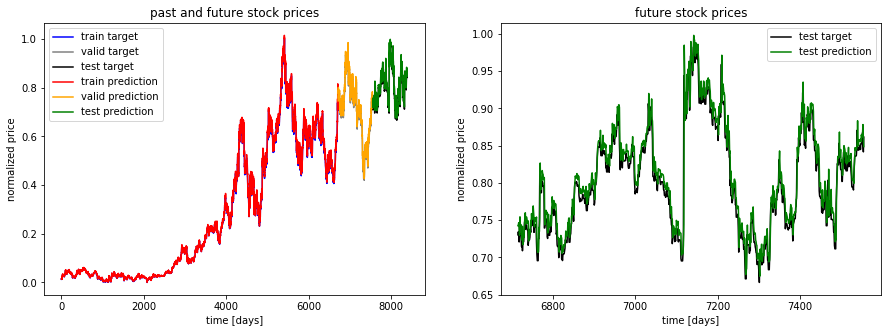

In [107]:
ft = 3 # 0 = open, 1 = high, 2 = low, 3 = close

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - low price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

rms_test = sqrt(mean_squared_error(y_test, y_test_pred))
rms_validate = sqrt(mean_squared_error(y_valid, y_valid_pred))
rms_train = sqrt(mean_squared_error(y_train, y_train_pred))

print('RMSE for test_dataset/validation_dataset/train_dataset: %.2f/%.2f/%.2f'%(
    rms_test,rms_validate,rms_train))


r2_test = r2_score(y_test,y_test_pred)
r2_validate = r2_score(y_valid,y_valid_pred)
r2_train = r2_score(y_train,y_train_pred)
print('R-squared for test_dataset/validation_dataset/train_dataset: %.2f/%.2f/%.2f'%(
    r2_test,r2_validate,r2_train))

# Prediction for Attack on stock Price

RMSE for attack_dataset: 0.02


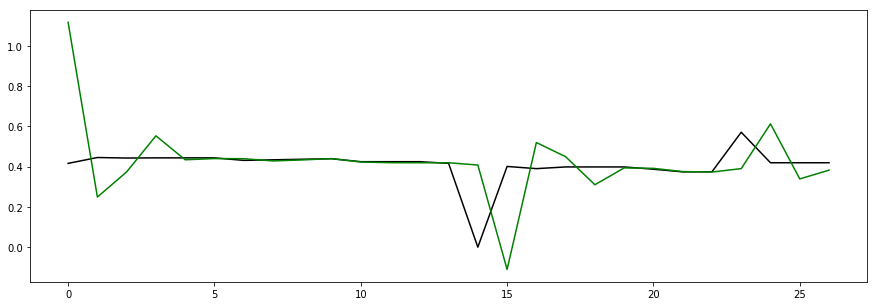

In [108]:
et = 0
plt.figure(figsize=(15,5))
plt.plot(y_attack[:,et], color='black', label='attack target')

plt.plot(y_attack_pred[:,et], color='green', label='test prediction')

rms_attack = sqrt(mean_squared_error(y_attack, y_attack_pred))

print('RMSE for attack_dataset: %.2f'%(
    rms_test))


# Prediction for Attack_revised on stock Price

RMSE for attack_dataset: 0.02


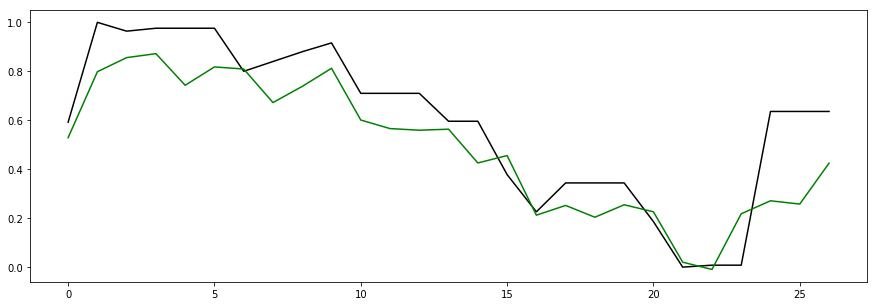

In [109]:
et = 0
plt.figure(figsize=(15,5))
plt.plot(y_attack_revised[:,et], color='black', label='attack target')

plt.plot(y_attack_revised_pred[:,et], color='green', label='test prediction')

rms_attack = sqrt(mean_squared_error(y_attack_revised, y_attack_revised_pred))

print('RMSE for attack_dataset: %.2f'%(
    rms_test))
